In [1]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym_map_bro
import gym_map_bro.src.toy_agents as toy_agents
from gym_map_bro.src.data import *
from gym_map_bro.src.datastore import *

env = gym.make('map-bro-v0')

In [2]:
env_config = {
    "col" : "dns.col",
    "N_batch": 5,										# Number of new lines to try to add to the datastores each epoch
    "batch_stocahsitic": False,							# Whether or not the number of lines in each batch is constant (False) or not (True)
    "name": ['deletion','Hot','Warm','Cold'],			# Names to identify different storage formats
    "ds_size": [10, 20, 40],							# Number of lines in each datastore
    "ds_frac": [1, 0.5, 0.25],							# Value coefficient associated with each storage option
    "val_weight": [np.array([1,1,1]),np.array([1,1,1]),np.array([1,1,1])],								# Weights applied to each value column
    "val_func": linear_val_func,# function for determining total value from various value columns
    "ds_decay": [0.9, 0.95, 0.99],						# Rate at which Value decays in each DataStore
    "vals": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Values associated with each line of data
               pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
               pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])],
    "init_rplan": [np.hstack((np.mgrid[0:10, 1:4][1].astype(int),np.zeros(10).reshape(-1,1).astype(int))),
                    np.hstack((np.mgrid[0:20, 1:4][1].astype(int),np.zeros(20).reshape(-1,1).astype(int))),
                    np.hstack((np.mgrid[0:40, 1:4][1].astype(int),np.zeros(40).reshape(-1,1).astype(int)))], #Initially start with a hot to cold retention plan for data
    "ind": [np.zeros(5).astype(int),np.zeros(10).astype(int),np.zeros(40).astype(int)], #All data is initialized to the first step of it's rplan
    "init_expir": [3,10,20], #Data 20 time steps old must be re-evaluated
    "df": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Dataframes that hold actual datastore contents
           pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
           pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])]
}

In [3]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

0 rows expired in 3     Age  Key Terrain  Queries
0   2.0         0.25     0.25
1   5.0         1.00     1.00
2   4.0         0.25     0.25
3   3.0         0.25     0.25
4   2.0         0.25     0.25
5   2.0         0.25     0.25
6   NaN          NaN      NaN
7   NaN          NaN      NaN
8   NaN          NaN      NaN
9   NaN          NaN      NaN
10  NaN          NaN      NaN
11  NaN          NaN      NaN
12  NaN          NaN      NaN
13  NaN          NaN      NaN
14  NaN          NaN      NaN
15  NaN          NaN      NaN
16  NaN          NaN      NaN
17  NaN          NaN      NaN
18  NaN          NaN      NaN
19  NaN          NaN      NaN
20  NaN          NaN      NaN
21  NaN          NaN      NaN
22  NaN          NaN      NaN
23  NaN          NaN      NaN
24  NaN          NaN      NaN
25  NaN          NaN      NaN
26  NaN          NaN      NaN
27  NaN          NaN      NaN
28  NaN          NaN      NaN
29  NaN          NaN      NaN
30  NaN          NaN      NaN
31  NaN          NaN

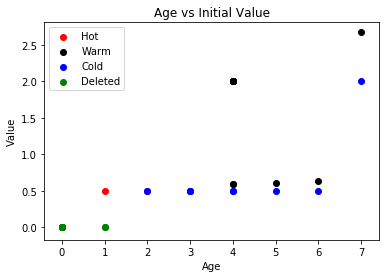

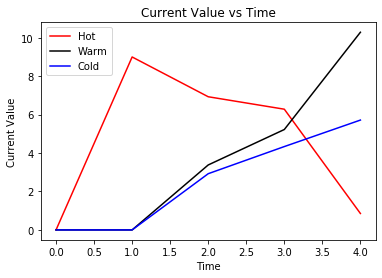

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


In [7]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pd.read_csv("dns.log",header = 0)
vals = pd.DataFrame(np.ones((5,3))*0.25,columns=['Age','Key Terrain','Queries'])#np.random.random((5,3)),columns=['Age','Key Terrain','Queries'])
vals['Age'] = 0
val_tot = np.zeros(5)
rplan = np.hstack((np.mgrid[0:5, 1:4][1].astype(int),np.zeros(5).reshape(-1,1).astype(int)))
ind = np.zeros(5)
loop += 5
db = dataBatch(batch,vals,val_tot,ind,rplan)

toy_agents.batch_load_static(env, db, 100)
t += 1
env.render(out=0)
clr = ['r','k','b']
sub = plt.subplot()
sub.set_title('Current Value vs Time')
sub.set_xlabel('Time')
sub.set_ylabel('Current Value')
for i in np.arange(env.num_ds):
    vals_plot[i].append(sum(env.ds[env.names[i+1]].dataBatch.get('val_tot')))
    sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

sub.legend(loc=2)
plt.show()

#env.render(out=1)
print(env.del_val)

## RL agent run

0 rows expired in 1    Age Key Terrain Queries
0  NaN         NaN     NaN
1  NaN         NaN     NaN
2  NaN         NaN     NaN
3  NaN         NaN     NaN
4  NaN         NaN     NaN
0 rows expired in 2    Age Key Terrain Queries
0  NaN         NaN     NaN
1  NaN         NaN     NaN
2  NaN         NaN     NaN
3  NaN         NaN     NaN
4  NaN         NaN     NaN
5  NaN         NaN     NaN
6  NaN         NaN     NaN
7  NaN         NaN     NaN
8  NaN         NaN     NaN
9  NaN         NaN     NaN
0 rows expired in 3     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  N

/Users/afitts/projects/MAP_bro/gym_map_bro/src/toy_agents.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = 1./np.log10(i+1.)


RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
CHECK 0 1
CHECK 0 1
CHECK 0 1
CHECK 0 1
CHECK 0 1
Hot    Age  Key Terrain   Queries
0  1.0     0.715189  0.602763
1  1.0     0.423655  0.645894
2  1.0     0.891773  0.963663
3  1.0     0.791725  0.528895
4  1.0     0.925597  0.071036
Warm    Age Key Terrain Queries
0  NaN         NaN     NaN
1  NaN         NaN     NaN
2  NaN         NaN     NaN
3  NaN         NaN     NaN
4  NaN         NaN     NaN
5  NaN         NaN     NaN
6  NaN         NaN     NaN
7  NaN         NaN     NaN
8  NaN         NaN     NaN
9  NaN         NaN     NaN


/Users/afitts/projects/MAP_bro/gym_map_bro/src/data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.batch[i].val[0] += 1


Cold     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
20  NaN         NaN     NaN
21  NaN         NaN     NaN
22  NaN         NaN     NaN
23  NaN         NaN     NaN
24  NaN         NaN     NaN
25  NaN         NaN     NaN
26  NaN         NaN     NaN
27  NaN         NaN     NaN
28  NaN         NaN     NaN
29  NaN         NaN     NaN
30  NaN         NaN     NaN
31  NaN         NaN     NaN
32  NaN         NaN     NaN
33  NaN         NaN     NaN
34  NaN        

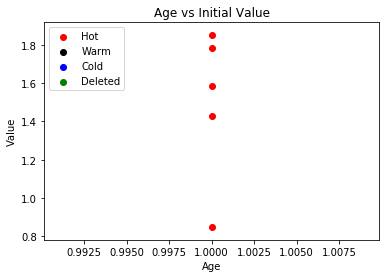

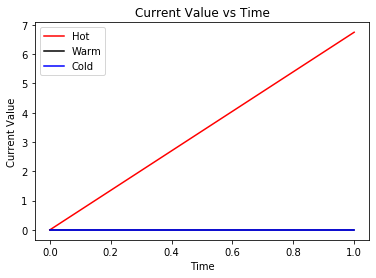

[]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.715189  0.602763
1  1.0     0.423655  0.645894
2  1.0     0.891773  0.963663
3  1.0     0.791725  0.528895
4  1.0     0.925597  0.071036
0 rows expired in 2    Age Key Terrain Queries
0  NaN         NaN     NaN
1  NaN         NaN     NaN
2  NaN         NaN     NaN
3  NaN         NaN     NaN
4  NaN         NaN     NaN
5  NaN         NaN     NaN
6  NaN         NaN     NaN
7  NaN         NaN     NaN
8  NaN         NaN     NaN
9  NaN         NaN     NaN
0 rows expired in 3     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN     

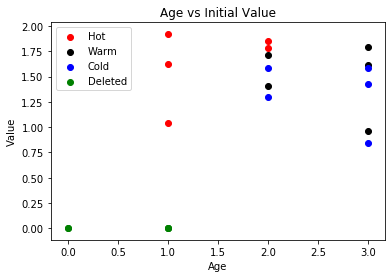

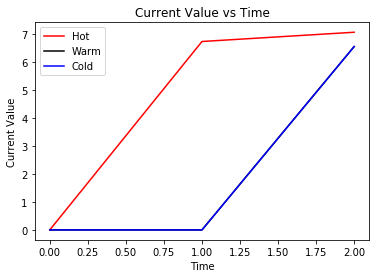

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0]]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.962770  0.016872
1  1.0     0.813679  0.509807
2  2.0     0.891773  0.963663
3  1.0     0.519952  0.693956
4  2.0     0.925597  0.071036
0 rows expired in 2    Age  Key Terrain   Queries
0  3.0     0.423655  0.645894
1  3.0     0.715189  0.602763
2  2.0     0.647197  0.600392
3  3.0     0.791725  0.528895
4  2.0     0.790840  0.097243
5  NaN          NaN       NaN
6  NaN          NaN       NaN
7  NaN          NaN       NaN
8  NaN          NaN       NaN
9  NaN          NaN       NaN
0 rows expired in 3     Age  Key Terrain   Queries
0   3.0     0.423655  0.645894
1   3.0     0.715189  0.602763
2   2.0     0.647197  0.600392
3   3.0     0.791725  0.528895
4   2.0     0.790840  0.097243
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       N

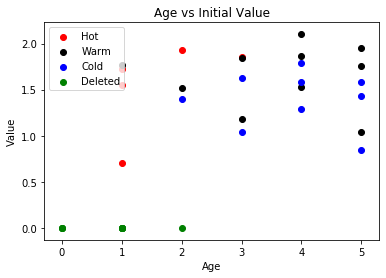

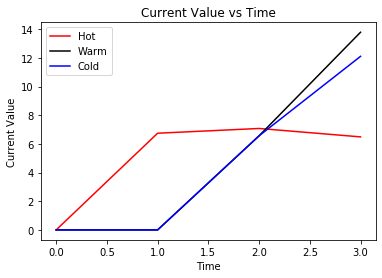

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0]]
1 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.962770  0.016872
1  1.0     0.354225  0.120277
2  1.0     0.861123  0.617657
3  1.0     0.774501  0.140957
4  3.0     0.925597  0.071036
0 rows expired in 2    Age  Key Terrain   Queries
0  5.0     0.423655  0.645894
1  5.0     0.715189  0.602763
2  4.0     0.647197  0.600392
3  5.0     0.791725  0.528895
4  4.0     0.790840  0.097243
5  3.0     0.519952  0.693956
6  4.0     0.891773  0.963663
7  3.0     0.813679  0.509807
8  2.0     0.700856  0.913284
9  1.0     0.885022  0.100252
0 rows expired in 3     Age  Key Terrain   Queries
0   5.0     0.423655  0.645894
1   5.0     0.715189  0.602763
2   4.0     0.647197  0.600392
3   5.0     0.791725  0.528895
4   4.0     0.790840  0.097243
5   3.0     0.519952  0.693956
6   4.0     0.891773  0.963663
7   3.0     0.813679  0.509807
8   2.0     0.700856  0.913284

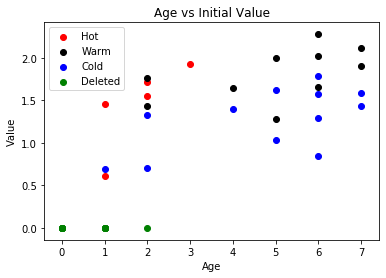

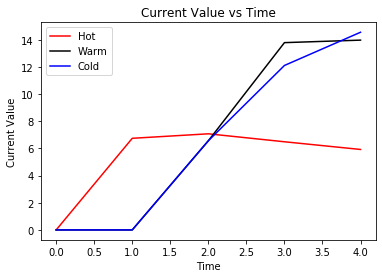

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
1 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.962770  0.016872
1  1.0     0.732142  0.890112
2  2.0     0.861123  0.617657
3  2.0     0.774501  0.140957
4  1.0     0.307532  0.875692
0 rows expired in 2    Age  Key Terrain   Queries
0  2.0     0.662856  0.845365
1  7.0     0.715189  0.602763
2  6.0     0.647197  0.600392
3  7.0     0.791725  0.528895
4  6.0     0.790840  0.097243
5  5.0     0.519952  0.693956
6  6.0     0.891773  0.963663
7  5.0     0.813679  0.509807
8  4.0     0.700856  0.913284
9  2.0     0.885022  0.100252
0 rows expired in 3     Age  Key Terrain   Queries
0   6.0     0.423655  0.645894
1   7.0     0.715189  0.602763
2   6.0     0.647197  0.600392
3   7.0     0.791725  0.528895
4   6.0     0.790840  0.097243
5   5.0     0.519952  0.693956
6   6.0     0.891773  0.963663
7   5.0     0

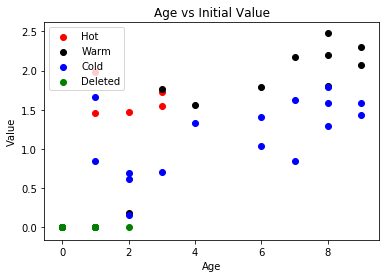

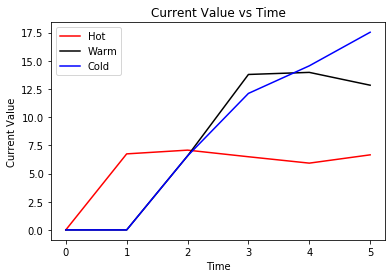

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
2 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.728948  0.569196
1  2.0     0.732142  0.890112
2  3.0     0.861123  0.617657
3  3.0     0.774501  0.140957
4  1.0     0.987435  0.013655
0 rows expired in 2    Age  Key Terrain   Queries
0  4.0     0.662856  0.845365
1  9.0     0.715189  0.602763
2  8.0     0.647197  0.600392
3  9.0     0.791725  0.528895
4  8.0     0.790840  0.097243
5  2.0     0.080467  0.542187
6  8.0     0.891773  0.963663
7  7.0     0.813679  0.509807
8  6.0     0.700856  0.913284
9  3.0     0.885022  0.100252
0 rows expired in 3     Age  Key Terrain   Queries
0   7.0     0.423655  0.645894
1   9.0     0.715189  0.602763
2   8.0     0.647197  0.600392
3   9.0     0.791725  0.528895
4   8.0     0.790840  0.097243
5   6.0     0.519952  0.693956
6   8.0 

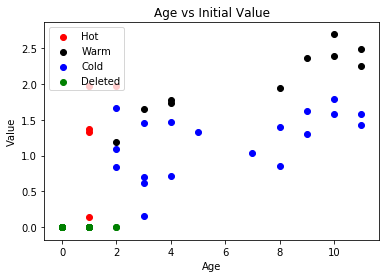

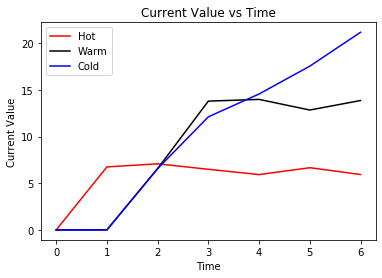

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0]]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.073197  0.154117
1  1.0     0.686291  0.602076
2  1.0     0.665082  0.738402
3  1.0     0.982803  0.499461
4  2.0     0.987435  0.013655
4 rows expired in 2     Age  Key Terrain   Queries
0   2.0     0.545854  0.939096
1  11.0     0.715189  0.602763
2   3.0     0.728948  0.569196
3  11.0     0.791725  0.528895
4  10.0     0.790840  0.097243
5   4.0     0.732142  0.890112
6  10.0     0.891773  0.963663
7   9.0     0.813679  0.509807
8   8.0     0.700856  0.913284
9   4.0     0.885022  0.100252
0 rows expired in 3      Age  Key Terrain   Queries
0    8.0     0.423655  0.645894
1   11.0     0.715189  0.602763
2    9.0     0.647197  0.600392
3   11.0     0.791725  0.528895
4   10.0     0.790

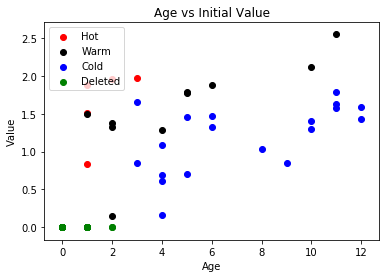

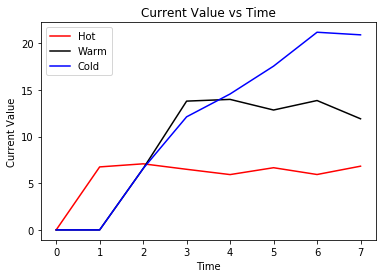

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.937294  0.933600
1  1.0     0.416967  0.973519
2  1.0     0.752491  0.006238
3  2.0     0.982803  0.499461
4  3.0     0.987435  0.013655
2 rows expired in 2     Age  Key Terrain   Queries
0   4.0     0.545854  0.939096
1   1.0     0.747382  0.155701
2   5.0     0.728948  0.569196
3   2.0     0.073197  0.154117
4   2.0     0.665082  0.738402
5   6.0     0.732142  0.890112
6   2.0     0.686291  0.602076
7  11.0     0.813679  0.509807
8  10.0     0.700856  0.913284
9   5.0     0.885022  0.100252
0 rows expired in 3      Age  Key Terrain   Queries
0    9.0     0.423655  0.645894
1   12.0     0.715189  0.602763
2   10.0     0.647197  0.600392
3   12.0     0.791725  0.528895
4   11

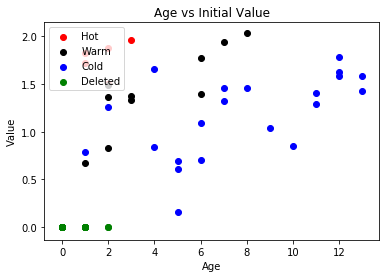

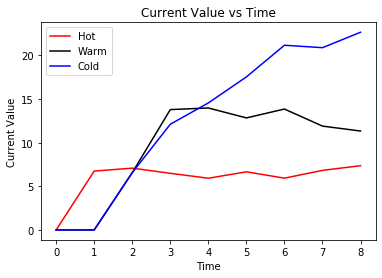

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
1 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.937294  0.933600
1  1.0     0.861476  0.804333
2  2.0     0.752491  0.006238
3  3.0     0.982803  0.499461
4  1.0     0.911049  0.040155
0 rows expired in 2    Age  Key Terrain   Queries
0  6.0     0.545854  0.939096
1  2.0     0.747382  0.155701
2  7.0     0.728948  0.569196
3  2.0     0.630017  0.272040
4  3.0     0.665082  0.738402
5  8.0     0.732142  0.890112
6  3.0     0.686291  0.602076
7  1.0     0.338103  0.610335
8  2.0     0.416967  0.973519
9  6.0     0.885022  0.100252
0 rows expired in 3      Age  Key Terrain   Queries
0   10.0     0.423655  0.645894
1   13.0     0.715189  0.602763
2   11.0     0.647197  0.600392
3   13.0     0.791725  0.528895
4   1

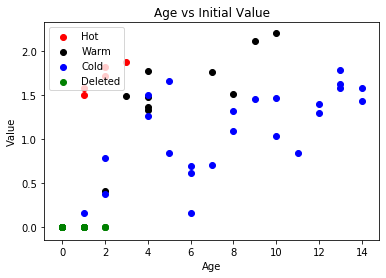

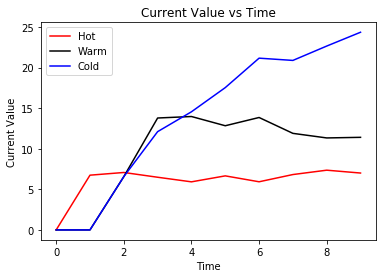

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
1 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.937294  0.933600
1  2.0     0.861476  0.804333
2  1.0     0.749036  0.651309
3  1.0     0.790533  0.381446
4  2.0     0.911049  0.040155
1 rows expired in 2     Age  Key Terrain   Queries
0   8.0     0.545854  0.939096
1   3.0     0.747382  0.155701
2   9.0     0.728948  0.569196
3   4.0     0.630017  0.272040
4   4.0     0.665082  0.738402
5  10.0     0.732142  0.890112
6   4.0     0.686291  0.602076
7   4.0     0.752491  0.006238
8   2.0     0.189530  0.930547
9   7.0     0.885022  0.100252
0 rows expired in 3      Age  Key Terrain   Queries
0   11.0     0.423655  0.645894
1   14.0     0.715189  0.602763
2   12.0  

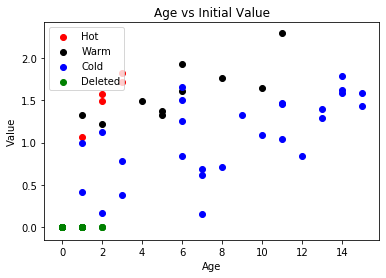

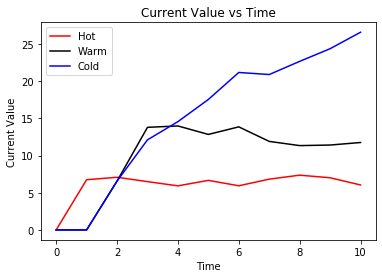

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
2 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.536263  0.149578
1  3.0     0.861476  0.804333
2  2.0     0.749036  0.651309
3  2.0     0.790533  0.381446
4  3.0     0.911049  0.040155
2 rows expired in 2     Age  Key Terrain   Queries
0  10.0     0.545854  0.939096
1   4.0     0.747382  0.155701
2  11.0     0.728948  0.569196
3   6.0     0.630017  0.272040
4   5.0     0.665082  0.738402
5   1.0     0.666273  0.638042
6   5.0     0.686291  0.602076
7   6.0     0.752491  0.006238
8   2.0     0.564070  0.471141
9   8.0     0.885022  0.100252
0 rows expired in 3      Age  Key Terrain   Queries
0   12.0     0.423655  0.645894
1   15

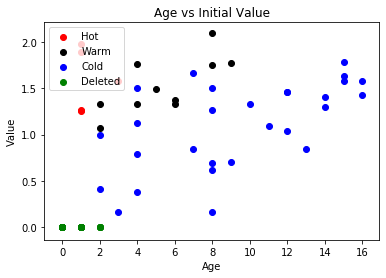

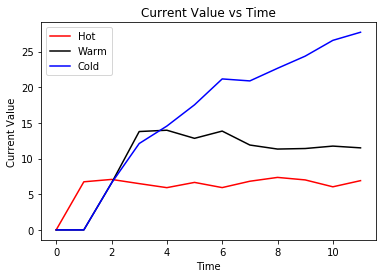

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0]]
1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.633732  0.665686
1  1.0     0.990552  0.463073
2  1.0     0.944879  0.258045
3  3.0     0.790533  0.381446
4  1.0     0.627129  0.623577
0 rows expired in 2    Age  Key Terrain   Queries
0  4.0     0.749036  0.651309
1  5.0     0.747382  0.155701
2  2.0     0.536263  0.149578
3  8.0     0.630017  0.272040
4  6.0     0.665082  0.738402
5  2.0     0.666273  0.638042
6  6.0     0.686291  0.602076
7  8.0     0.752491  0.006238
8  4.0     0.564070  0.471141
9  9.0     0.885022  0.100252
0 rows expired in 3      Age  Key Terrain   Queries
0   13.0     0.423655  0.645894
1   1

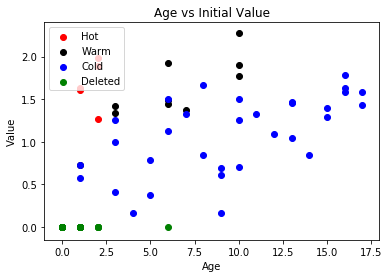

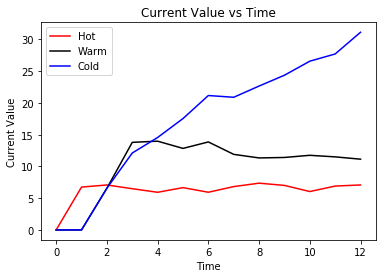

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0]]
0 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.633732  0.665686
1  2.0     0.990552  0.463073
2  2.0     0.944879  0.258045
3  1.0     0.806428  0.221583
4  1.0     0.814227  0.793437
3 rows expired in 2     Age  Key Terrain   Queries
0   6.0     0.749036  0.651309
1   6.0     0.747382  0.155701
2   3.0     0.627129  0.623577
3  10.0     0.630017  0.272040
4   1.0     0.364073  0.156313
5   3.0     0.666273  0.638042
6   7.0     0.686291  0.602076
7  10.0     0.752491  0.006238
8   6.0     0.564070  0.471141
9  10.0     0.885022  0.100252
0 rows expired in 3      Age  

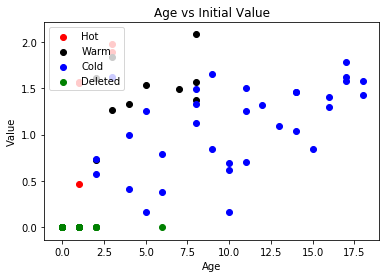

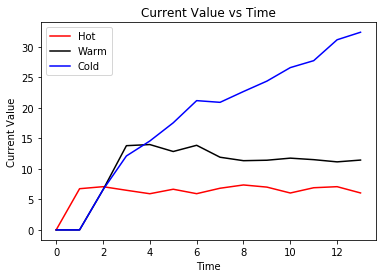

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0]]
2 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.784985  0.044670
1  3.0     0.990552  0.463073
2  3.0     0.944879  0.258045
3  1.0     0.778588  0.080559
4  1.0     0.231063  0.127394
0 rows expired in 2    Age  Key Terrain   Queries
0  8.0     0.749036  0.651309
1  7.0     0.747382  0.155701
2  5.0     0.627129  0.623577
3  3.0     0.633732  0.665686
4  2.0     0.364073  0.156313
5  4.0     0.666273  0.638042
6  8.0     0.686291  0.602076
7  3.0     0.814227  0.793437
8  8.0     0.564070  0.471141
9  2.0     0.806428  0.221583
0 rows expired in

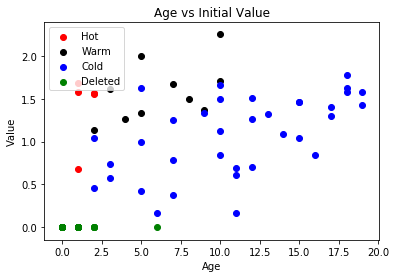

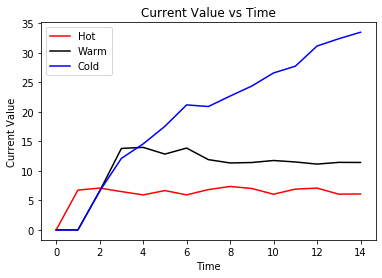

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
0 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.784985  0.044670
1  1.0     0.790108  0.981974
2  1.0     0.841413  0.489790
3  2.0     0.778588  0.080559
4  1.0     0.340392  0.757492
2 rows expired in 2     Age  Key Terrain   Queries
0  10.0     0.749036  0.651309
1   8.0     0.747382  0.155701
2   7.0     0.627129  0.623577
3   4.0     0.633732  0.665686
4   2.0     0.521308  0.481923
5   5.0     0.666273  0.638042
6   9.0     0.686291  0.602076
7   5.0     0.814227  0.793437
8  10.0     0.564070  0.471141
9

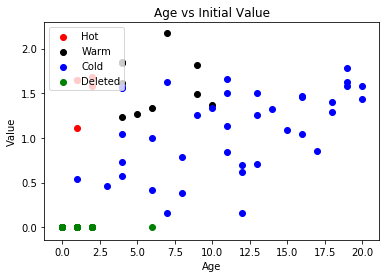

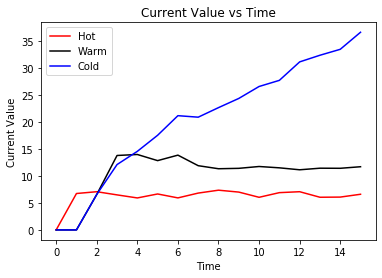

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0]]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.556388  0.491628
1  2.0     0.790108  0.981974
2  2.0     0.841413  0.489790
3  1.0     0.822732  0.200927
4  1.0     0.822685  0.066756
1 rows expired in 2     Age  Key Terrain   Queries
0   4.0     0.784985  0.044670
1   9.0     0.747382  0.155701
2   9.0     0.627129  0.623577
3   5.0     0.633732  0.665686
4   4.0     0.521308  0.481923
5   6.0     0.666273  0.638042
6  10.0     0.686291  0.602076
7   7.0     0.814227  0.793

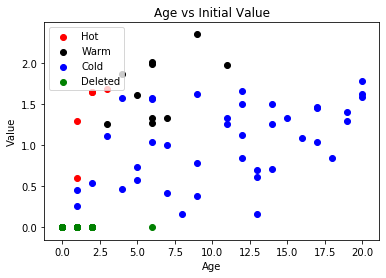

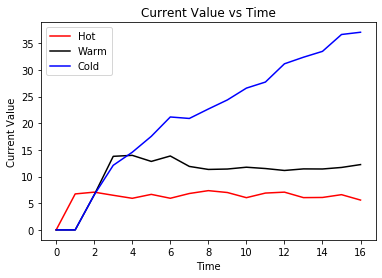

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0]]
1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.647056  0.455640
1  1.0     0.298444  0.265725
2  3.0     0.841413  0.489790
3  2.0     0.822732  0.200927
4  2.0     0.822685  0.066756
1 rows expired in 2     Age  Key Terrain   Queries
0   6.0     0.784985  0.044670
1   4.0     0.790108  0.981974
2  11.0     0.627129  0.623577
3   6.0     0.633732  0.665686
4   6.0     0.521308  0.481923
5   7.0     0.666273  0.638042
6   3.0   

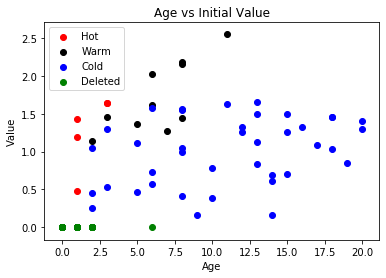

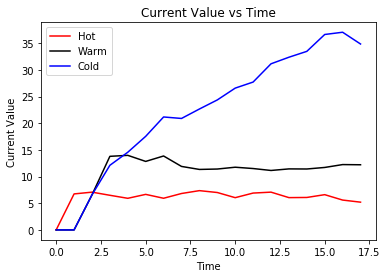

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan]]
2 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.240039  0.333131
1  1.0     0.718236  0.784043
2  1.0     0.598664  0.029745
3  3.0     0.822732  0.200927
4  3.0     0.822685  0.066756
1 rows expired in 2     Age  Key Terrain   Queries
0   8.0     0.784985  0.044670
1   6.0     0.790108  0.981974
2   2.0     0.526453  0.793133
3   7.0     0.633732  0.665686
4   8.0     0.521308  0.481923
5   3

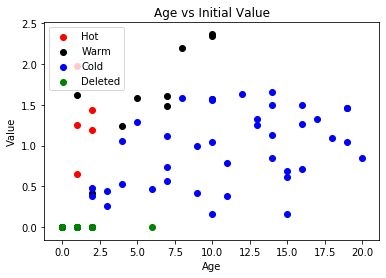

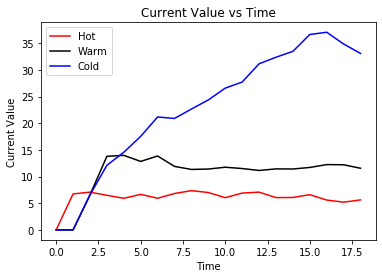

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan]]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.624507  0.342236
1  2.0     0.718236  0.784043
2  2.0     0.598664  0.029745
3  1.0     0.990540  0.535903
4  1.0     0.324029  0.238830
3 rows expired in 2     Age  Key Terrain   Queries
0  10.0     0.784985  0.044670
1   8.0     0.790108  0.981974
2   4.0     0.526453  0.793133
3   2.0     0.192971  0.283930
4  10.0     

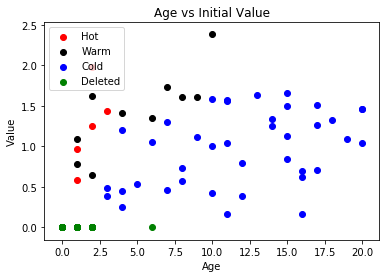

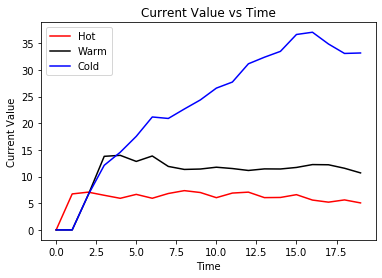

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan]]
1 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.624507  0.342236
1  3.0     0.718236  0.784043
2  1.0     0.290592  0.516296
3  2.0     0.990540  0.535903
4  1.0     0.485618  0.156181
1 rows expired in 2     Age  Key Terrain   Queries
0   2.0     0.324029  0.238830
1  10.0     0.790108  0.981974
2   6.0     0.526453  0.793133
3   4.0     0.59866

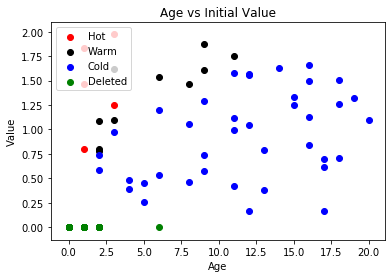

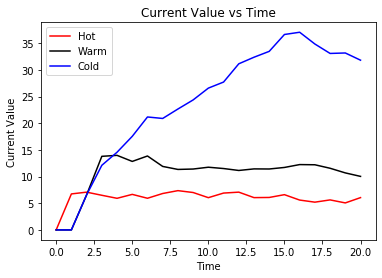

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan]]
2 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.624507  0.342236
1  1.0     0.919235  0.113799
2  1.0     0.733156  0.852391
3  3.0     0.990540  0.535903
4  1.0     0.402140  0.394633
1 rows expired in 2     Age  Key Terrain   Queries
0   3.0     0.485618  0.156181
1   2.0     0.367891  0.789841
2   8.0     0.

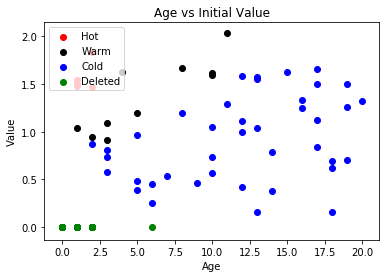

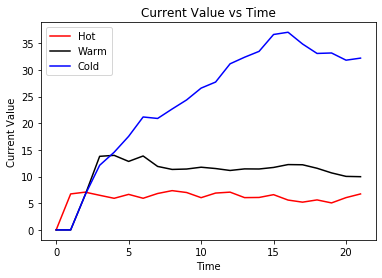

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0]]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.769384  0.633380
1  2.0     0.919235  0.113799
2  2.0     0.733156  0.852391
3  1.0     0.750430  0.160977
4  1.0     0.738954  0.010600
3 rows expired in 2     Age  Key Terrain   Queries
0   5.0     0.485618  0.156181
1   2.0     0.434240 

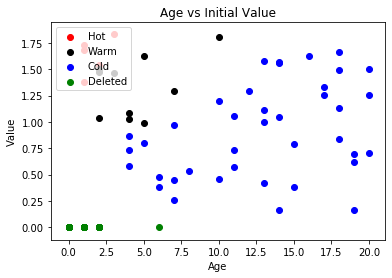

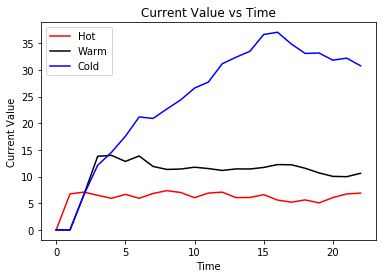

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
1 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.769384  0.633380
1  3.0     0.919235  0.113799
2  1.0     0.841441  0.156240
3  1.0     0.688695  0.757041
4  1.0     0.864218  0.358485
1 rows expired in 2     Age  Key Terrain   Queries
0   7.0     0.485618  0.1561

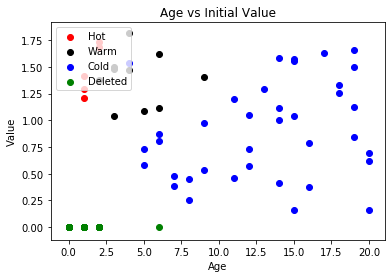

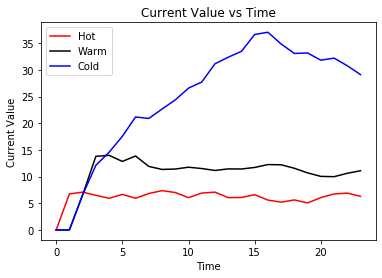

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0]]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.604432  0.228344
1  1.0     0.647913  0.225573
2  2.0     0.841441  0.156240
3  1.0     0.708686  0.520608
4  2.0     0.864218  0.358485
0 rows expired in 2    Age  Key Terrain   Q

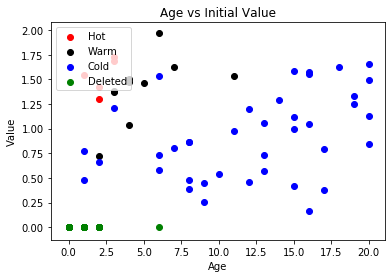

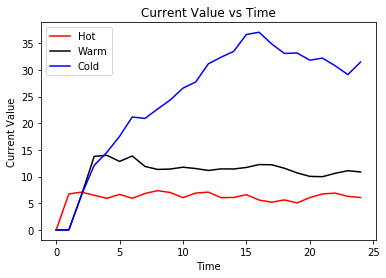

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0]]
2 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.772262  0.006085
1  2.0     0.647913  0.225573
2  3.0     0.841441  0.156240
3  2.0     0.708686  0.520608
4  3.0     0.864218  0.35

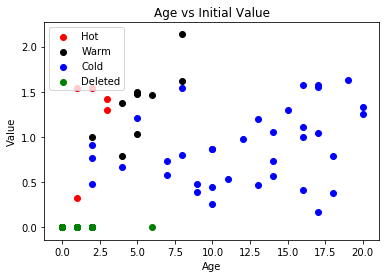

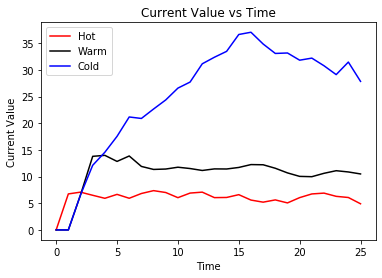

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0]]
2 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.772262  0.006085
1  3.0     0.647913  0.225573
2  1.0     0.768897  0.528894
3  3.0     0.708686  0.520608
4

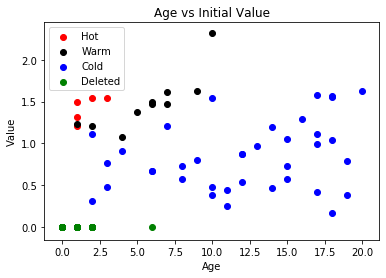

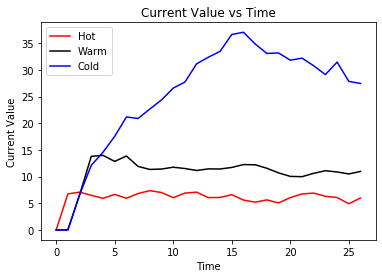

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0]]
1 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.772262  0.006085
1  1.0     0.748394  0.345002
2  2.0     0.768897  0.52

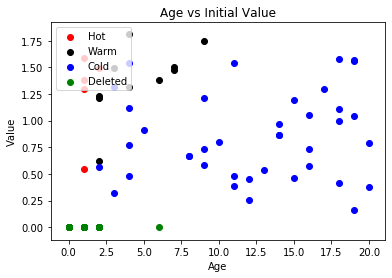

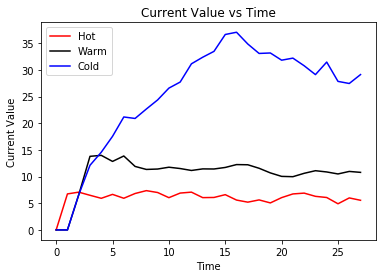

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0]]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.650877  0.973704
1  2.0     0.748394

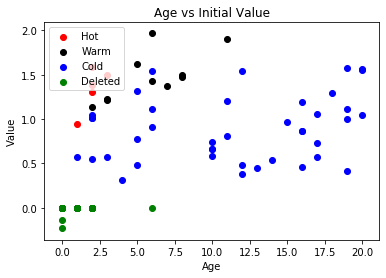

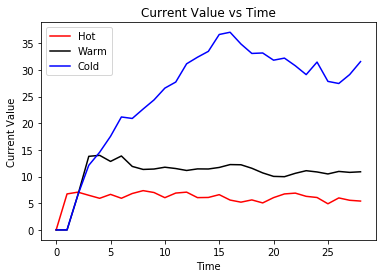

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094]]
1 rows 

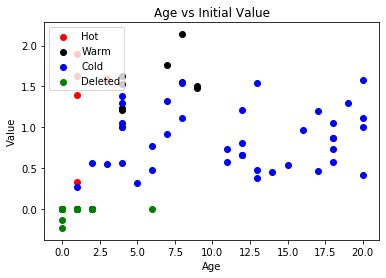

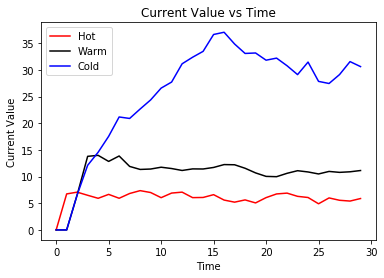

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

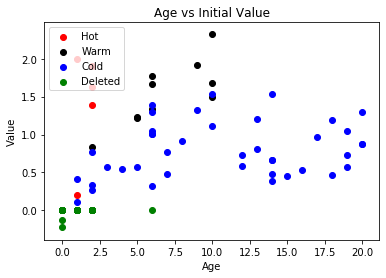

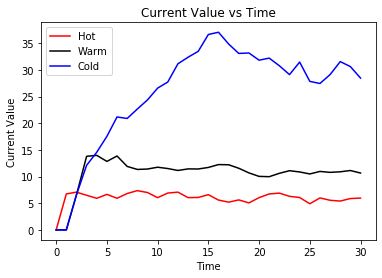

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

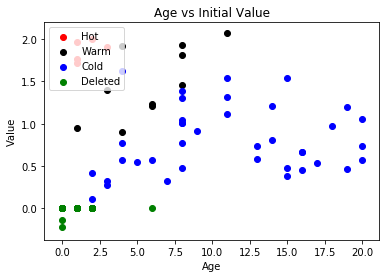

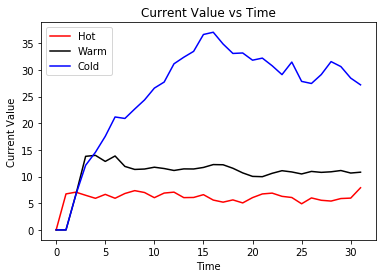

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

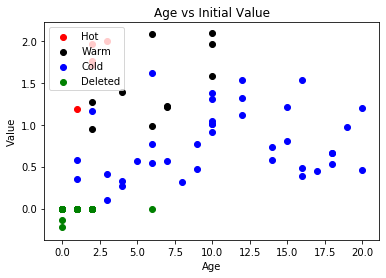

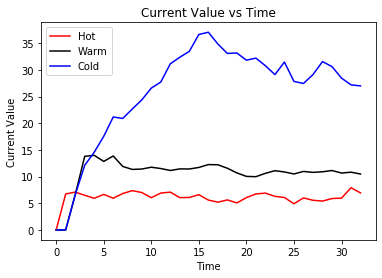

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

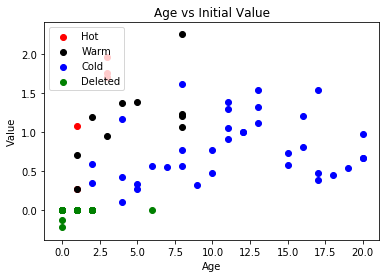

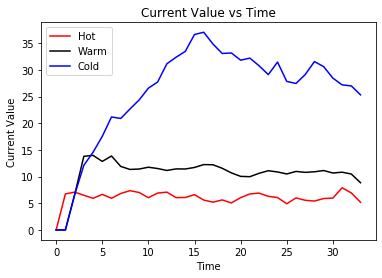

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

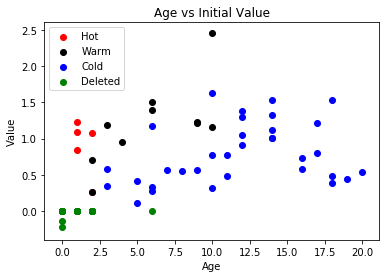

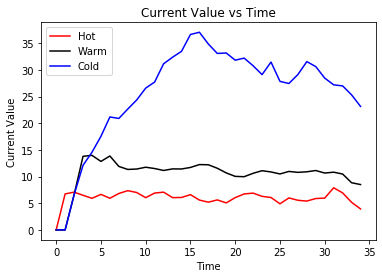

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

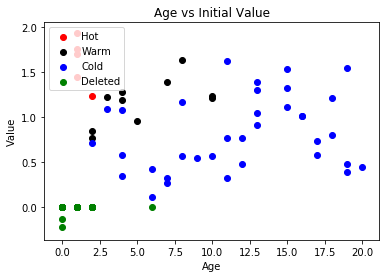

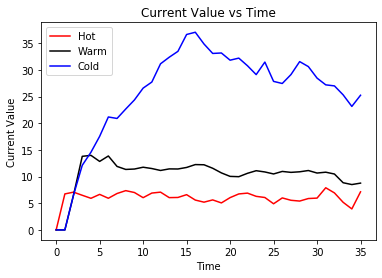

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

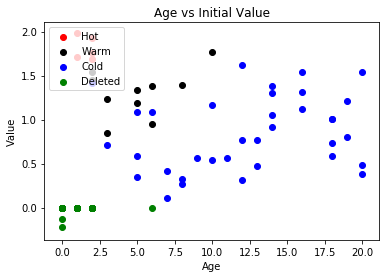

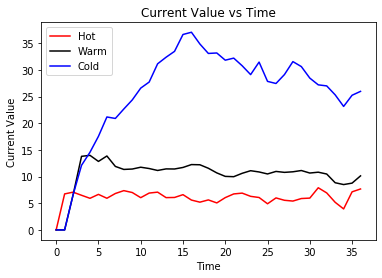

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

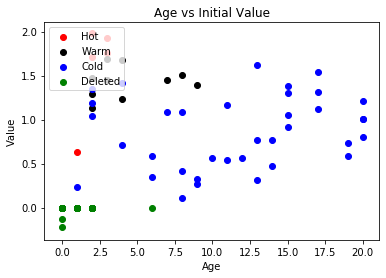

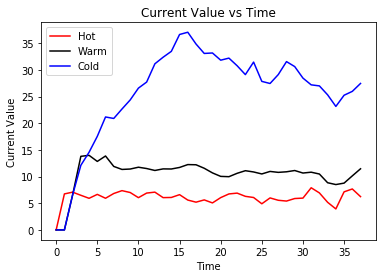

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

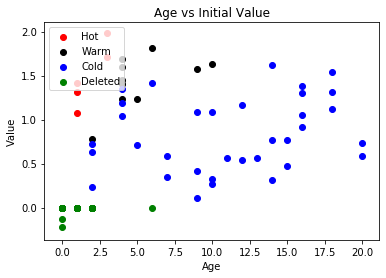

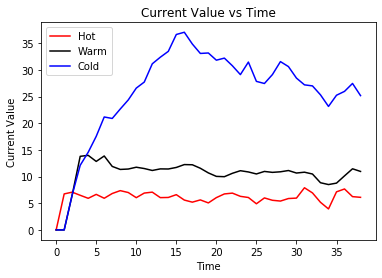

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

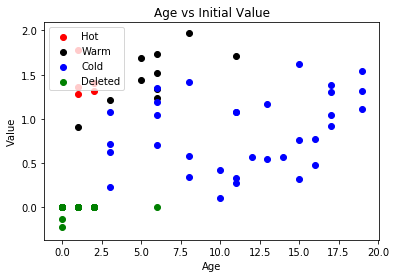

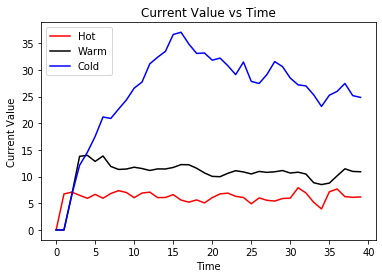

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

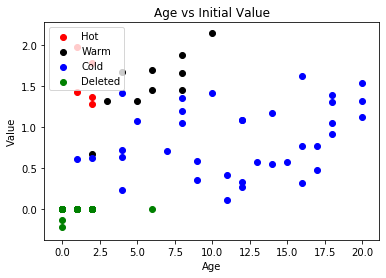

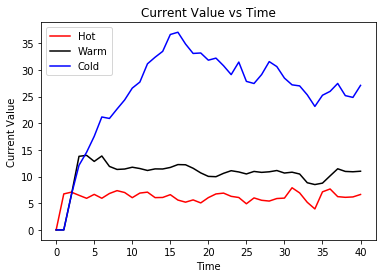

[[1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [6.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, nan], [1.0, nan], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, nan], [0.0, 0.0], [2.0, nan], [1.0, nan], [0.0, nan], [1.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, nan], [0.0, 0.0], [6.0, nan], [1.0, nan], [0.0, 0.0], [0.0, 0.0], [0.0, nan], [0.0, 0.0], [4.0, nan], [1.0, nan], [0.0, 0.0], [1.0, nan], [2.0, 0.0], [0.0, 0.0], [1.0, nan], [0.0, nan], [0.0, 0.0], [0.0, 0.13494847336187132], [0.0, 0.22514027724166094], [0.0, n

In [3]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

for q in np.arange(40):
    # New batch of 5 lines, here represented by 5 random values
    batch = pd.read_csv("dns.log",header = 0)
    vals = pd.DataFrame(np.random.random((5,3)),columns=['Age','Key Terrain','Queries'])
    vals['Age'] = 0
    val_tot = np.zeros(5)
    rplan = np.hstack((np.mgrid[0:5, 1:4][1].astype(int),np.zeros(5).reshape(-1,1).astype(int)))
    ind = np.zeros(5)
    loop += 5
    db = dataBatch(batch,vals,val_tot,ind,rplan)

    toy_agents.batch_load(env, db, 100)
    t += 1
    env.render(out=0)
    clr = ['r','k','b']
    sub = plt.subplot()
    sub.set_title('Current Value vs Time')
    sub.set_xlabel('Time')
    sub.set_ylabel('Current Value')
    for i in np.arange(env.num_ds):
        vals_plot[i].append(sum(env.ds[env.names[i+1]].dataBatch.get('val_tot')))
        sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

    sub.legend(loc=2)
    plt.show()

    #env.render(out=1)
    print(env.del_val)

## Static Policy

0 rows expired in 3     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
20  NaN         NaN     NaN
21  NaN         NaN     NaN
22  NaN         NaN     NaN
23  NaN         NaN     NaN
24  NaN         NaN     NaN
25  NaN         NaN     NaN
26  NaN         NaN     NaN
27  NaN         NaN     NaN
28  NaN         NaN     NaN
29  NaN         NaN     NaN
30  NaN         NaN     NaN
31  NaN         NaN     NaN
32  NaN         NaN     NaN
33  NaN         NaN     NaN


/Users/afitts/projects/MAP_bro/gym_map_bro/src/toy_agents.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = 1./np.log10(i+1.)


 1 2
Hot    Age  Key Terrain   Queries
0  1.0     0.423655  0.645894
1  1.0     0.891773  0.963663
2  1.0     0.791725  0.528895
3  NaN          NaN       NaN
4  NaN          NaN       NaN
Warm    Age  Key Terrain   Queries
0  1.0     0.715189  0.602763
1  1.0     0.925597  0.071036
2  NaN          NaN       NaN
3  NaN          NaN       NaN
4  NaN          NaN       NaN
5  NaN          NaN       NaN
6  NaN          NaN       NaN
7  NaN          NaN       NaN
8  NaN          NaN       NaN
9  NaN          NaN       NaN


/Users/afitts/projects/MAP_bro/gym_map_bro/src/data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.batch[i].val[0] += 1


Cold     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
20  NaN         NaN     NaN
21  NaN         NaN     NaN
22  NaN         NaN     NaN
23  NaN         NaN     NaN
24  NaN         NaN     NaN
25  NaN         NaN     NaN
26  NaN         NaN     NaN
27  NaN         NaN     NaN
28  NaN         NaN     NaN
29  NaN         NaN     NaN
30  NaN         NaN     NaN
31  NaN         NaN     NaN
32  NaN         NaN     NaN
33  NaN         NaN     NaN
34  NaN        

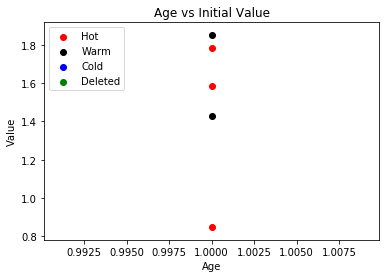

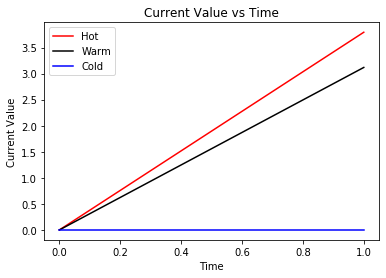

[]
0 rows expired in 3     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
20  NaN         NaN     NaN
21  NaN         NaN     NaN
22  NaN         NaN     NaN
23  NaN         NaN     NaN
24  NaN         NaN     NaN
25  NaN         NaN     NaN
26  NaN         NaN     NaN
27  NaN         NaN     NaN
28  NaN         NaN     NaN
29  NaN         NaN     NaN
30  NaN         NaN     NaN
31  NaN         NaN     NaN
32  NaN         NaN     NaN
33  NaN         NaN     N

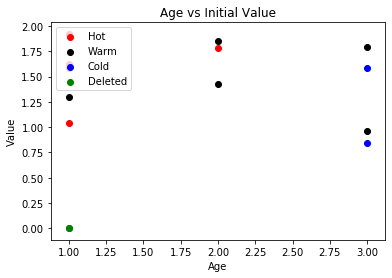

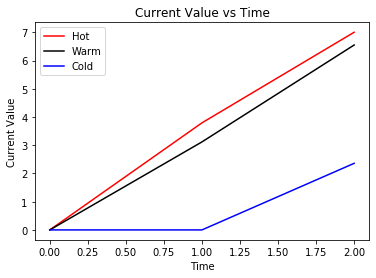

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0]]
0 rows expired in 3     Age  Key Terrain   Queries
0   3.0     0.423655  0.645894
1   3.0     0.791725  0.528895
2   NaN          NaN       NaN
3   NaN          NaN       NaN
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN
28  NaN          NaN

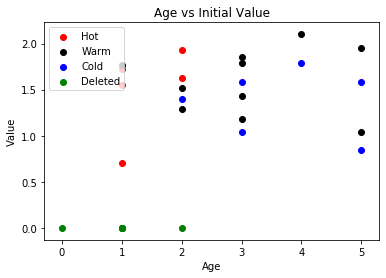

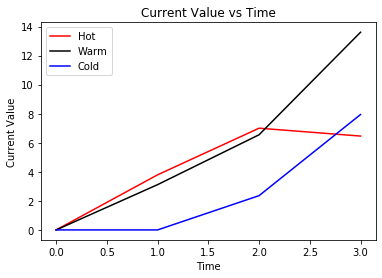

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0]]
0 rows expired in 3     Age  Key Terrain   Queries
0   5.0     0.423655  0.645894
1   5.0     0.791725  0.528895
2   3.0     0.519952  0.693956
3   3.0     0.790840  0.097243
4   4.0     0.891773  0.963663
5   2.0     0.700856  0.913284
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN  

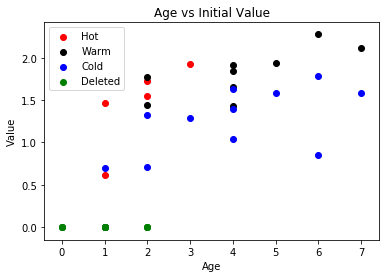

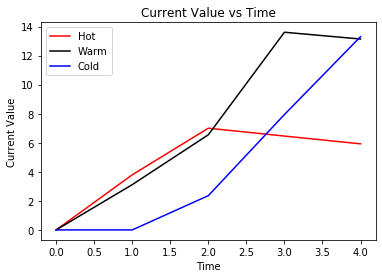

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0]]
0 rows expired in 3     Age  Key Terrain   Queries
0   6.0     0.423655  0.645894
1   7.0     0.791725  0.528895
2   4.0     0.519952  0.693956
3   5.0     0.790840  0.097243
4   6.0     0.891773  0.963663
5   4.0     0.700856  0.913284
6   2.0     0.354225  0.120277
7   1.0     0.346608  0.506532
8   4.0     0.813679  0.509807
9   2.0     0.662856  0.845365
10  3.0     0.647197  0.600392
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN    

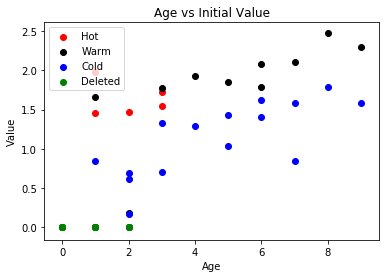

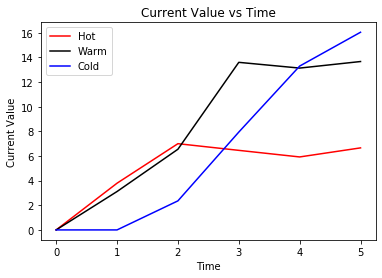

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
0 rows expired in 3     Age  Key Terrain   Queries
0   7.0     0.423655  0.645894
1   9.0     0.791725  0.528895
2   5.0     0.519952  0.693956
3   7.0     0.790840  0.097243
4   8.0     0.891773  0.963663
5   6.0     0.700856  0.913284
6   3.0     0.354225  0.120277
7   2.0     0.346608  0.506532
8   6.0     0.813679  0.509807
9   3.0     0.662856  0.845365
10  4.0     0.647197  0.600392
11  2.0     0.000367  0.273733
12  5.0     0.715189  0.602763
13  2.0     0.307532  0.875692
14  1.0     0.421273  0.926266
15  2.0     0.080467  0.542187
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN      

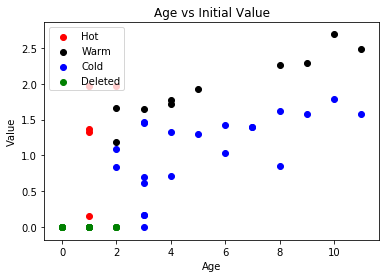

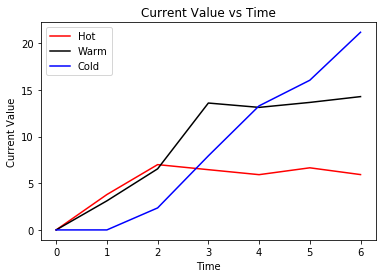

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0]]
0 rows expired in 3      Age  Key Terrain   Queries
0    8.0     0.423655  0.645894
1   11.0     0.791725  0.528895
2    6.0     0.519952  0.693956
3    9.0     0.790840  0.097243
4   10.0     0.891773  0.963663
5    7.0     0.700856  0.913284
6    4.0     0.354225  0.120277
7    3.0     0.346608  0.506532
8    8.0     0.813679  0.509807
9    4.0     0.662856  0.845365
10   5.0     0.647197  0.600392
11   3.0     0.000367  0.273733
12   6.0     0.715189  0.602763
13   3.0     0.307532  0.875692
14   2.0     0.421273  0.926266
15   3.0     0.080467  0.542187
16   3.0     0.080467  0.542187
17   7.0     0.700856  0.913284
18   3.0     0.732142  0.890112
19   3.0     0.728948  0.569196
20   2.

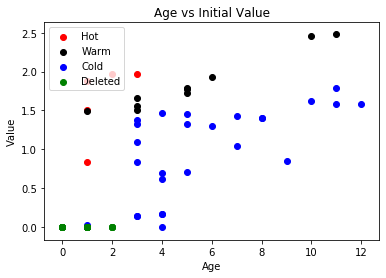

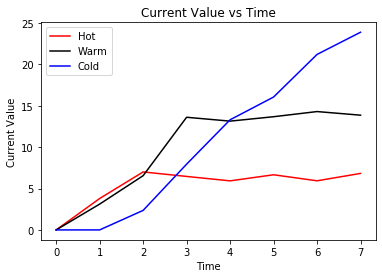

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
0 rows expired in 3      Age  Key Terrain   Queries
0    9.0     0.423655  0.645894
1   12.0     0.791725  0.528895
2    7.0     0.519952  0.693956
3   11.0     0.790840  0.097243
4   11.0     0.891773  0.963663
5    8.0     0.700856  0.913284
6    5.0     0.354225  0.120277
7    4.0     0.346608  0.506532
8   10.0     0.813679  0.509807
9    5.0     0.662856  0.845365
10   6.0     0.647197  0.600392
11   4.0     0.000367  0.273733
12   7.0     0.715189  0.602763
13   4.0     0.307532  0.875692
14   3.0     0.421273  0.926266
15   4.0     0.080467  0.542187
16   4.0     0.080467  0.542187
17   8.0     0.700856  0.913284
18   4.0   

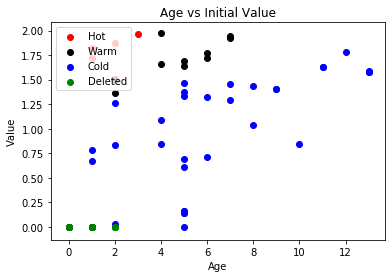

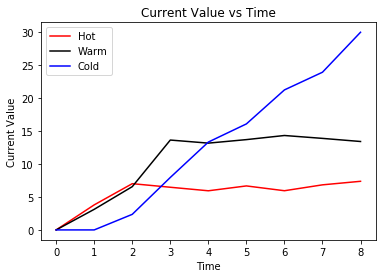

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
0 rows expired in 3      Age  Key Terrain   Queries
0   10.0     0.423655  0.645894
1   13.0     0.791725  0.528895
2    8.0     0.519952  0.693956
3   13.0     0.790840  0.097243
4   12.0     0.891773  0.963663
5    9.0     0.700856  0.913284
6    6.0     0.354225  0.120277
7    5.0     0.346608  0.506532
8   11.0     0.813679  0.509807
9    6.0     0.662856  0.845365
10   7.0     0.647197  0.600392
11   5.0     0.000367  0.273733
12   8.0     0.715189  0.602763
13   5.0     0.307532  0.875692
14   4.0     0.421273  0.926266
15   5.0     0.080467  0.542187
16   5.0     0.

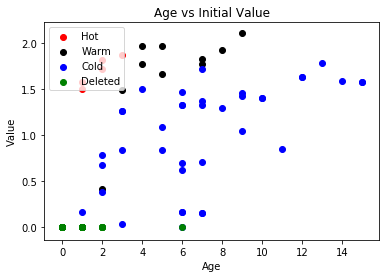

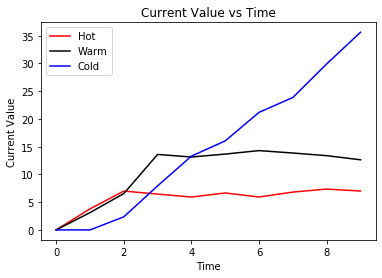

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0]]
0 rows expired in 3      Age  Key Terrain   Queries
0   11.0     0.423655  0.645894
1   14.0     0.791725  0.528895
2    9.0     0.519952  0.693956
3   15.0     0.790840  0.097243
4   13.0     0.891773  0.963663
5   10.0     0.700856  0.913284
6    7.0     0.354225  0.120277
7    6.0     0.346608  0.506532
8   12.0     0.813679  0.509807
9    7.0     0.662856  0.845365
10   8.0     0.647197  0.600392
11   6.0     0.000367  0.273733
12   9.0     0.715189  0.602763
13   6.0     0.307532  0.875692
14   5.0     0.4212

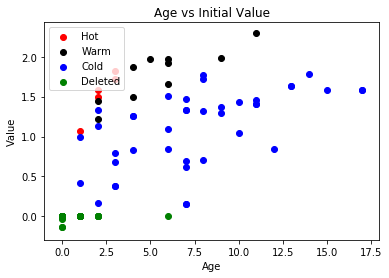

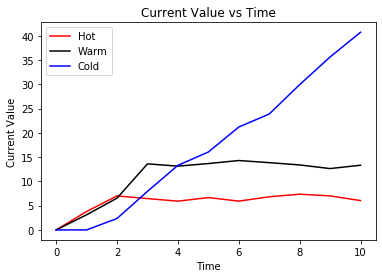

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715]]
0 rows expired in 3      Age  Key Terrain   Queries
0   12.0     0.423655  0.645894
1   15.0     0.791725  0.528895
2   10.0     0.519952  0.693956
3   17.0     0.790840  0.097243
4   14.0     0.891773  0.963663
5   11.0     0.700856  0.913284
6    8.0     0.354225  0.120277
7    7.0     0.346608  0.506532
8   13.0     0.813679  0.509807
9    8.0     0.662856  0.845365
10   9.0     0.647197  0.600392
11

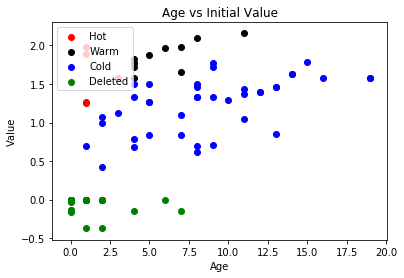

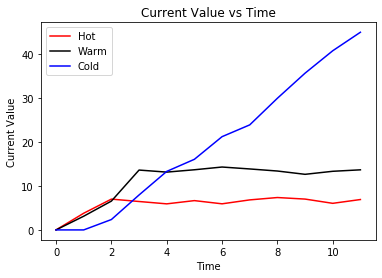

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706]]
0 rows expired in 3      Age  Key Terrain   Queries
0   13.0     0.423655  0.645894
1   16.0     0.791725  0.528895
2   11.0     0.519952  0.693956
3   19.0     0.790840  0.097243
4   15.0     0.891773  0.963663
5   12.0     0.700856  0.913284
6    9.0     0.354225  0

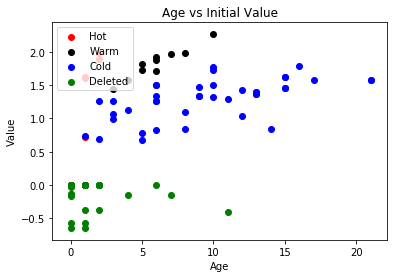

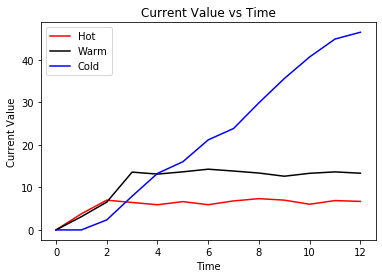

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484]]
2 rows expired in 3      Age  Key Terrain   Queries
0   14.0     0.423655  0.645894
1   17.0     0.791725  0.528895
2   12.0     0.519

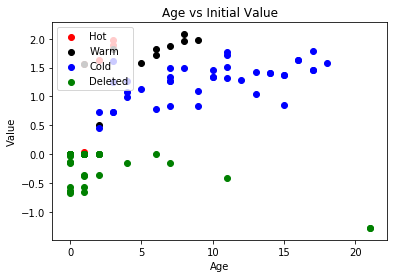

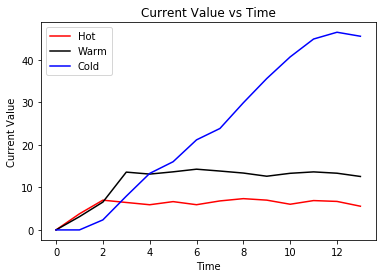

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

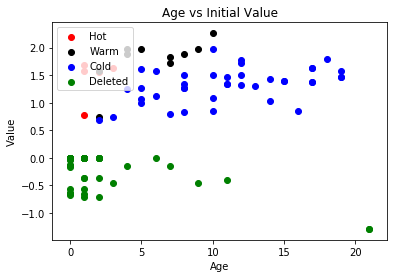

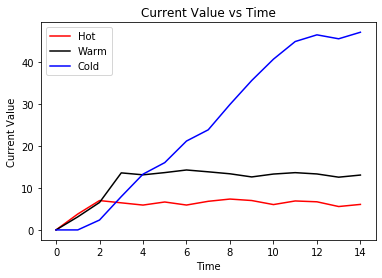

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

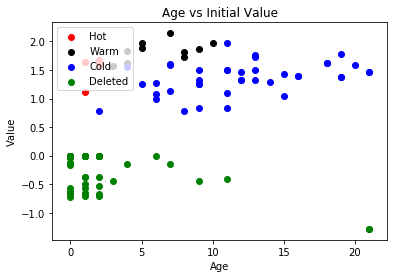

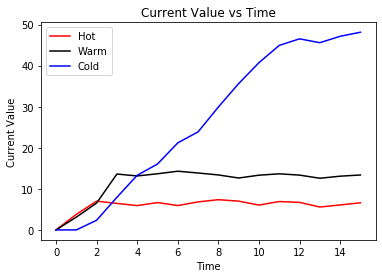

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

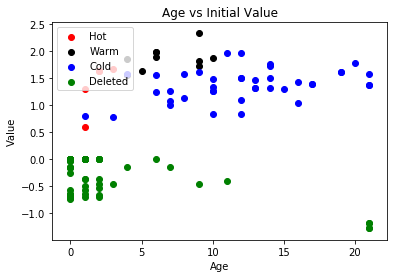

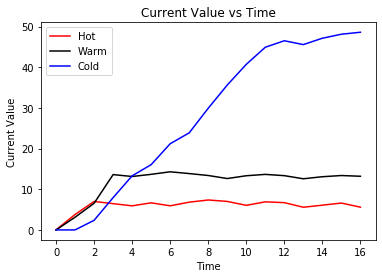

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

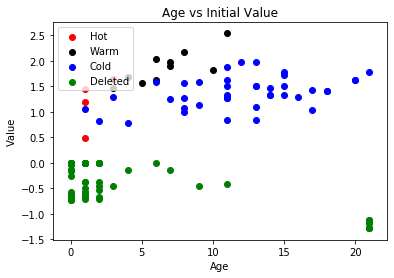

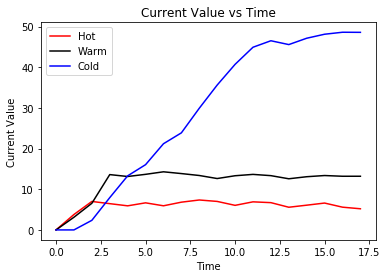

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

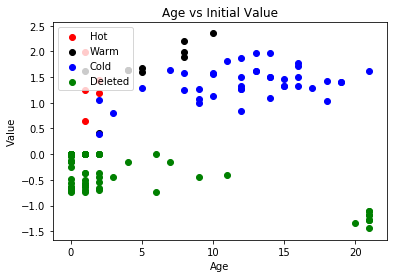

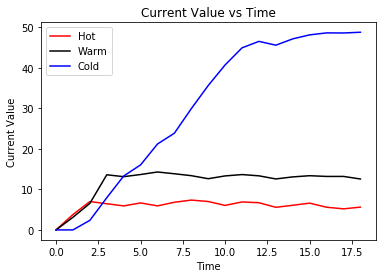

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

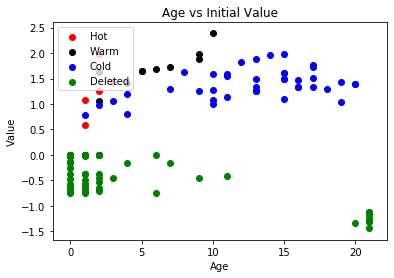

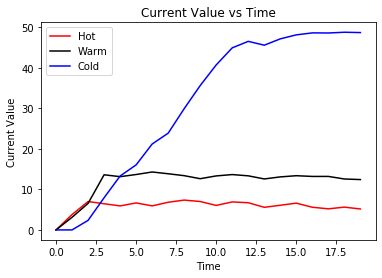

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

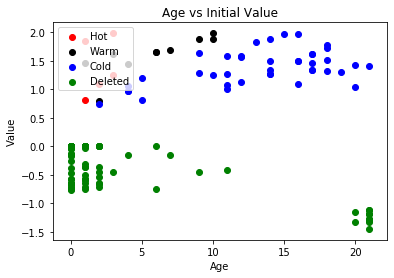

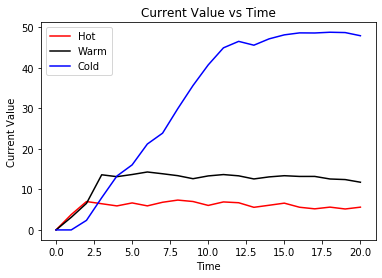

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

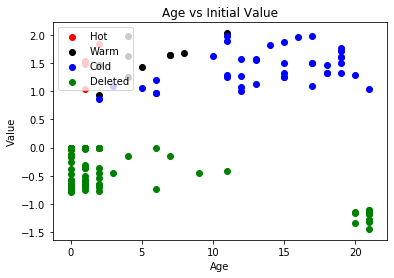

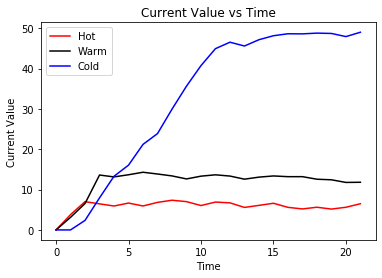

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

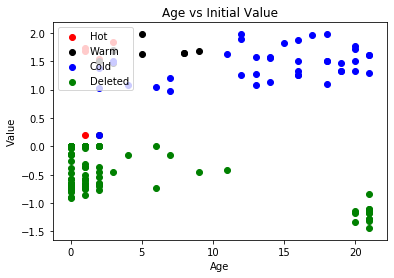

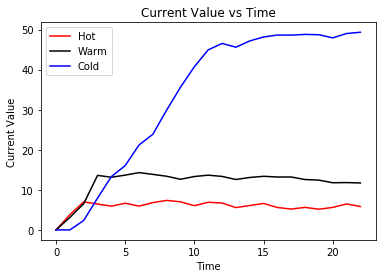

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

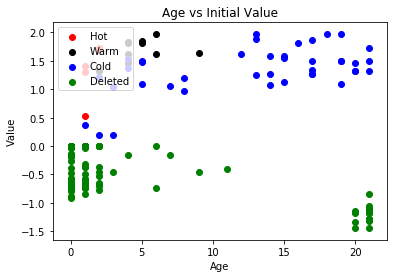

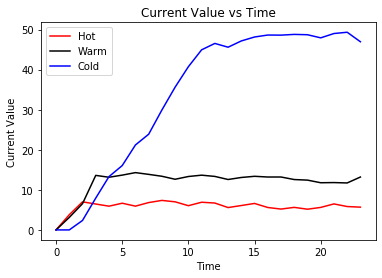

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

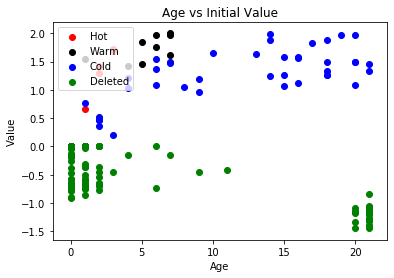

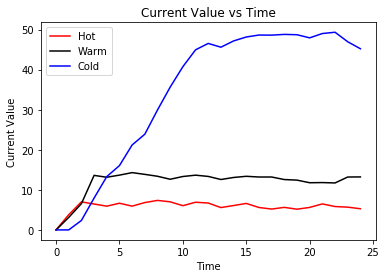

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

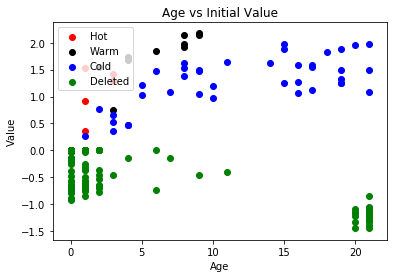

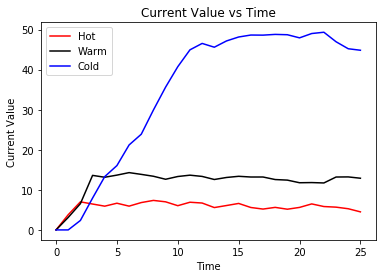

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

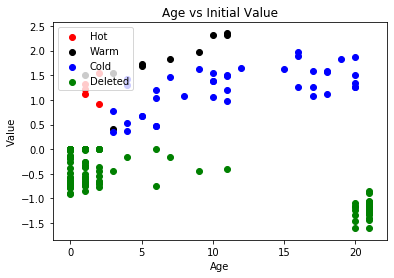

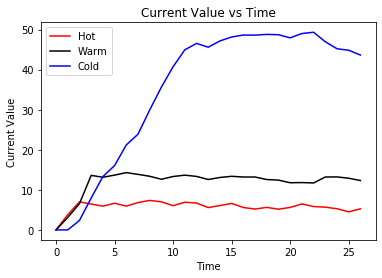

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

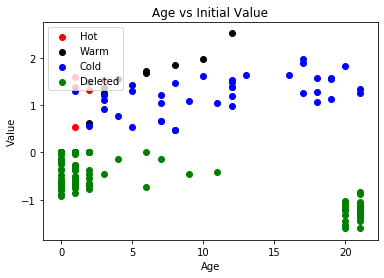

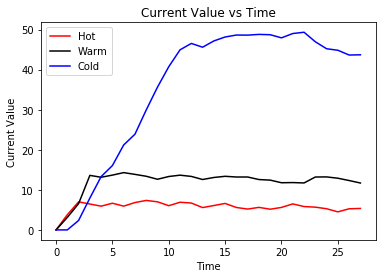

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

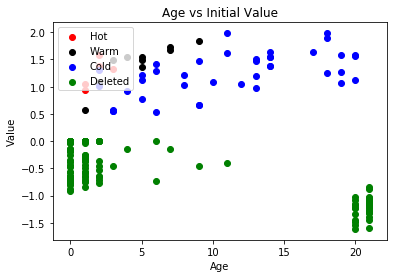

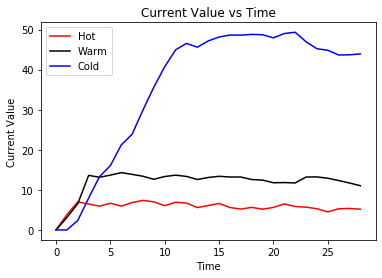

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

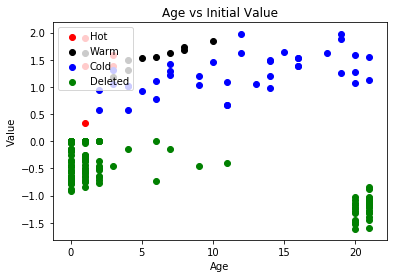

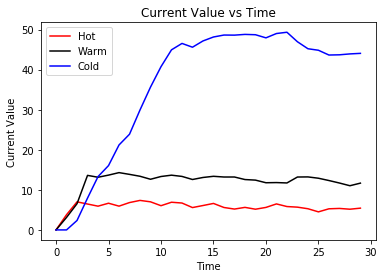

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

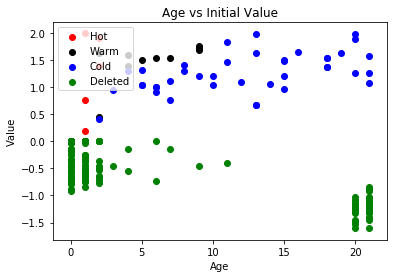

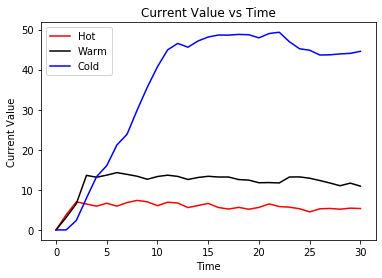

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

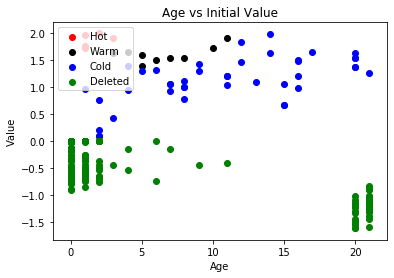

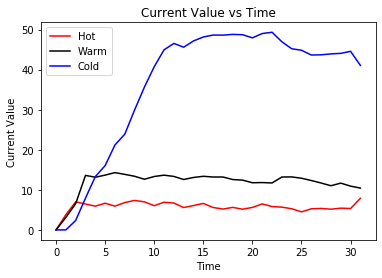

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

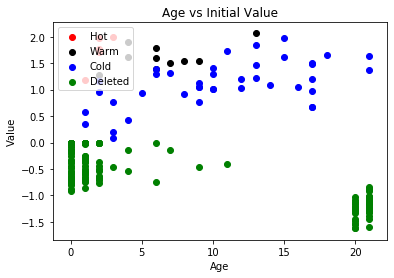

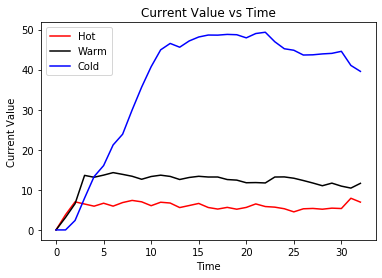

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

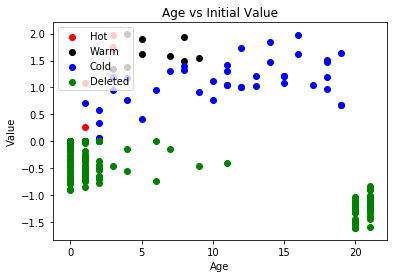

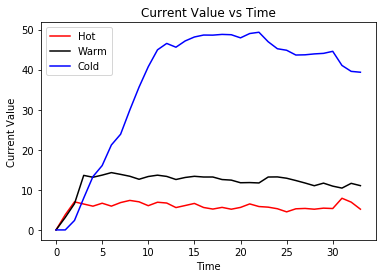

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

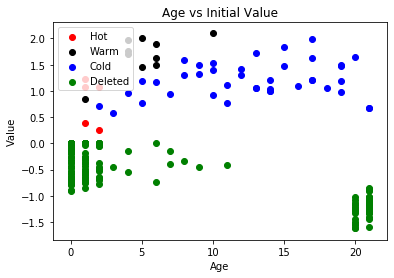

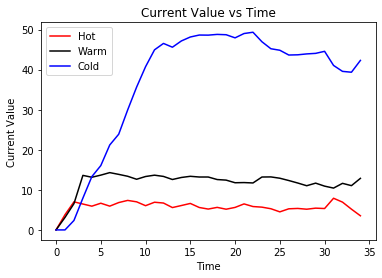

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

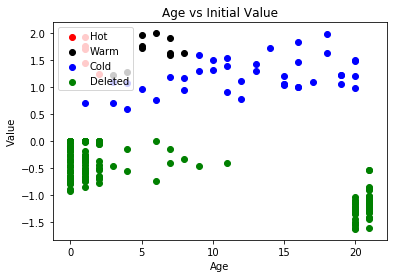

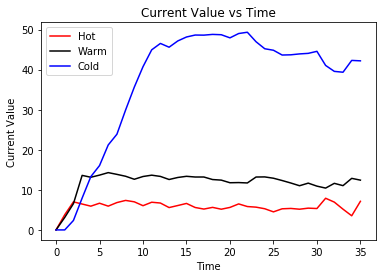

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

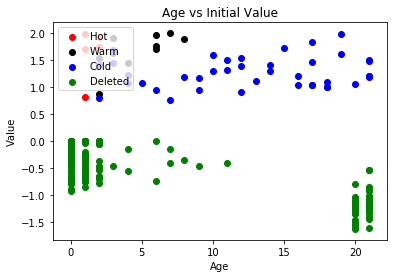

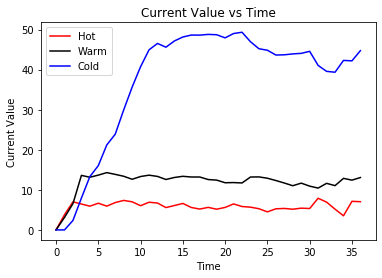

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

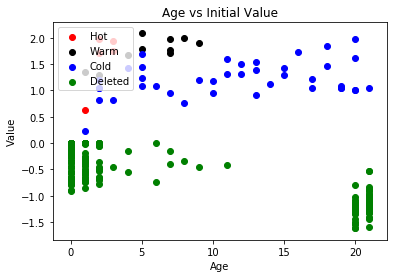

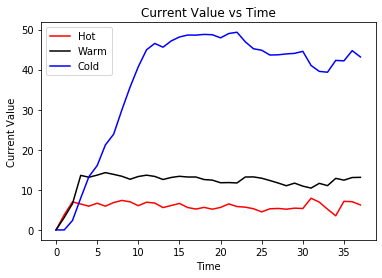

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

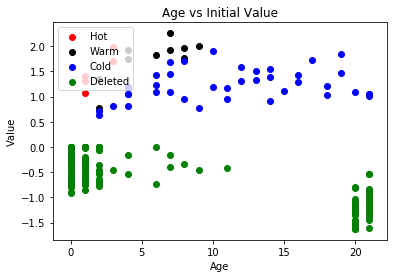

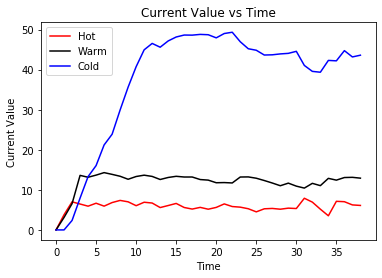

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

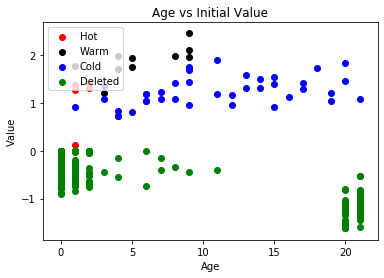

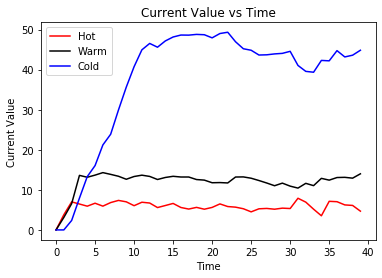

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

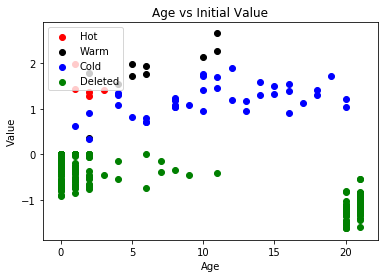

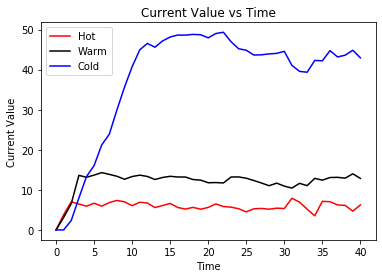

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [2.0, 0.0], [0.0, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [2.0, 0.0], [0.0, 0.0], [2.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [nan, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [2.0, 0.0], [6.0, 0.0], [0.0, 0.0], [nan, 0.0006916937000081404], [0.0, 0.026850601353772596], [0.0, 0.1364493310310715], [0.0, 0.1364493310310715], [7.0, 0.15000134766122347], [4.0, 0.15000134766122347], [0.0, 0.16009201381665075], [1.0, 0.3678023735732706], [2.0, 0.3678023735732706], [11.0, 0.4083304117324206], [0.0, 0.567547115111331], [0.0, 0.6396610365737813], [1.0, 0.570680740235588], [1.0, 0.6471809684520484], [21.0, 1.2807306389477573], [21.0, 1.2807306389477573], [1.0, nan], [1.0, nan], [0.0, 0.6430648446832247], [1.0, 0.3700259840486686], 

In [4]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

for q in np.arange(40):
    # New batch of 5 lines, here represented by 5 random values
    batch = pd.read_csv("dns.log",header = 0)
    vals = pd.DataFrame(np.random.random((5,3)),columns=['Age','Key Terrain','Queries'])
    vals['Age'] = 0
    val_tot = [np.nan for x in range(5)]
    rplan = np.hstack((np.mgrid[0:5, 1:4][1].astype(int),np.zeros(5).reshape(-1,1).astype(int)))
    ind = np.zeros(5)
    loop += 5
    db = dataBatch(batch,vals,val_tot,ind,rplan)

    toy_agents.batch_load_static(env, db, 100)
    t += 1
    env.render(out=0)
    clr = ['r','k','b']
    sub = plt.subplot()
    sub.set_title('Current Value vs Time')
    sub.set_xlabel('Time')
    sub.set_ylabel('Current Value')
    for i in np.arange(env.num_ds):
        vals_plot[i].append(sum(env.ds[env.names[i+1]].dataBatch.get('val_tot')))
        sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

    sub.legend(loc=2)
    plt.show()

    #env.render(out=1)
    print(env.del_val)

In [ ]:
[np.nan for x in range(3)]

In [5]:
a = [1,2,3,0]